In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def denoise_image(img_bgr, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21):
        """
        img_bgr,             # input image (BGR format)
        None,                # output (None means return a new image)
        h,                   # strength for luminance (brightness) filtering
        hColor,              # strength for color filtering
        templateWindowSize,  # size of the small patch (region) compared
        searchWindowSize     # size of the bigger window to search for similar patches
        """
    denoised = cv2.fastNlMeansDenoisingColored(img_bgr, None, h, hColor, templateWindowSize, searchWindowSize)
    return denoised


In [3]:
def sharpen_image(img_bgr, alpha=1.5):
 
    # Convert to float for processing
    img_float = img_bgr.astype(np.float32)

    # Apply Gaussian blur to get the low-frequency parts
    blurred = cv2.GaussianBlur(img_float, (0, 0), sigmaX=3)

    # Compute mask = original - blurred (high-frequency detail)
    mask = img_float - blurred

    # Add mask to original image with scaling factor alpha
    sharpened = img_float + alpha * mask

    # Clip to valid 0-255 and convert back to uint8
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened


In [4]:
def display_images_side_by_side(images, titles):

    n = len(images)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axs = [axs]
    for ax, img, title in zip(axs, images, titles):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [5]:
def save_image_to_directory(img_bgr, save_dir, filename):

    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, filename)
    success = cv2.imwrite(save_path, img_bgr)
    if success:
        print(f"Image saved successfully at: {save_path}")
    else:
        print(f"Failed to save image at: {save_path}")

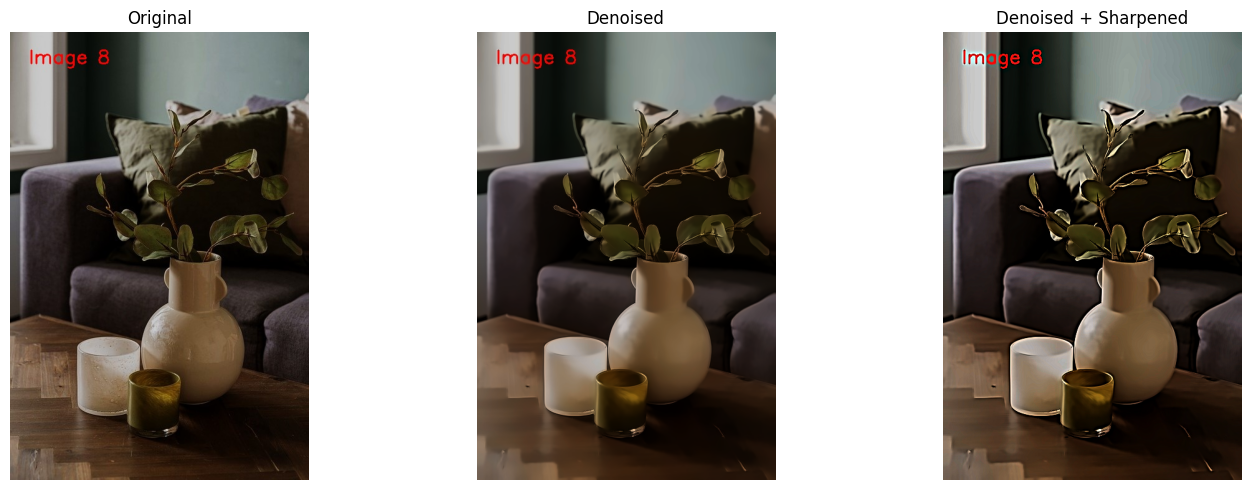

Image saved successfully at: D:/AutoEnhnace/Denoised\denoise_and_sharpened_numbered_8.jpg


In [7]:
if __name__ == "__main__":
    # Update this path accordingly
    image_path = r"IMAGE_FOLDER_PATH"
    output_dir = r'OUTPUT_FOLDER_PATH'
    output_filename = 'ENHANCED_IMAGE_LABEL.extension'

    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image from {image_path}")
        exit(1)

    # Noise reduction (tune h,hColor for strength)
    denoised_img = denoise_image(img, h=10, hColor=10)

    # Sharpen the denoised image (tune alpha for sharpness)
    sharpened_img = sharpen_image(denoised_img, alpha=1.5)

    # Show original, denoised, and sharpened images side by side
    display_images_side_by_side(
        [img, denoised_img, sharpened_img],
        ["Original", "Denoised", "Denoised + Sharpened"]
    )

    save_image_to_directory(sharpened_img, output_dir, output_filename)

    